Nernay Kumar
Intern Id 
INT2026-9021

In [ ]:
# Install required packages
%pip install numpy pandas matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Generate 10,000 random house prices (between 100,000 and 1,000,000)
np.random.seed(42)
house_prices = np.random.uniform(100000, 1000000, 9900)

# Add some outliers (extremely low and high prices)
outliers_low = np.array([10000, 15000, 20000, 25000, 30000])  # Very cheap houses (50 values)
outliers_high = np.array([5000000, 8000000, 12000000, 15000000, 20000000])  # Very expensive houses (50 values)

# Combine normal prices with outliers
house_prices = np.concatenate([house_prices, outliers_low, outliers_high])
np.random.shuffle(house_prices)  # Shuffle to mix outliers

print(f"Generated {len(house_prices)} house prices (including outliers)")
print(f"Sample prices: {house_prices[:5]}")
print(f"Min price: ${house_prices.min():,.0f}")
print(f"Max price: ${house_prices.max():,.0f}")

Generated 9910 house prices (including outliers)
Sample prices: [137723.69504463 228565.25857075 165270.08525903 246386.99637091
 943146.76539228]
Min price: $10,000
Max price: $20,000,000


In [18]:
# 1. Calculate average price
average_price = np.mean(house_prices)
print(f"Average house price: ${average_price:,.2f}")

Average house price: $550,412.28


In [19]:
# 2. Remove outliers using IQR method
Q1 = np.percentile(house_prices, 25)
Q3 = np.percentile(house_prices, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter prices without outliers
prices_no_outliers = house_prices[(house_prices >= lower_bound) & (house_prices <= upper_bound)]

# Find outliers
outliers = house_prices[(house_prices < lower_bound) | (house_prices > upper_bound)]

print(f"Q1 (25th percentile): ${Q1:,.2f}")
print(f"Q3 (75th percentile): ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"\nOutlier bounds:")
print(f"  Lower bound: ${lower_bound:,.2f}")
print(f"  Upper bound: ${upper_bound:,.2f}")
print(f"\nOriginal count: {len(house_prices)}")
print(f"After removing outliers: {len(prices_no_outliers)}")
print(f"Outliers removed: {len(outliers)}")
print(f"\nOutlier prices: {np.sort(outliers)}")

Q1 (25th percentile): $321,460.74
Q3 (75th percentile): $766,391.82
IQR: $444,931.08

Outlier bounds:
  Lower bound: $-345,935.88
  Upper bound: $1,433,788.44

Original count: 9910
After removing outliers: 9905
Outliers removed: 5

Outlier prices: [ 5000000.  8000000. 12000000. 15000000. 20000000.]


C:\Users\My-Pc\AppData\Local\Temp\ipykernel_24164\2397459028.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([house_prices, prices_no_outliers], labels=['With Outliers', 'Without Outliers'])


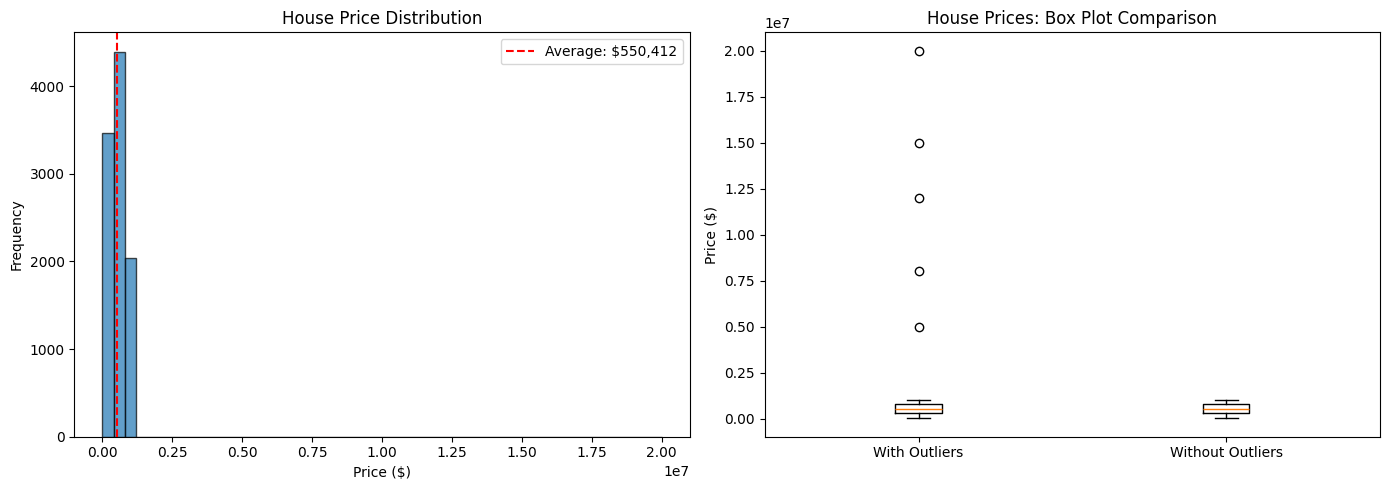

In [20]:
# 3. Visualize price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(house_prices, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('House Price Distribution')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(average_price, color='red', linestyle='--', label=f'Average: ${average_price:,.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot([house_prices, prices_no_outliers], labels=['With Outliers', 'Without Outliers'])
axes[1].set_title('House Prices: Box Plot Comparison')
axes[1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

## Series vs DataFrame

**Series:** 1-dimensional labeled array (like a single column)  
**DataFrame:** 2-dimensional labeled data structure (like a table with rows and columns)

In [21]:
# Example: Series (1D)
price_series = pd.Series(house_prices[:5], name='House_Price')
print("Series:")
print(price_series)
print(f"\nType: {type(price_series)}")
print(f"Shape: {price_series.shape}")

Series:
0    137723.695045
1    228565.258571
2    165270.085259
3    246386.996371
4    943146.765392
Name: House_Price, dtype: float64

Type: <class 'pandas.core.series.Series'>
Shape: (5,)


In [22]:
# Example: DataFrame (2D)
price_df = pd.DataFrame({
    'House_ID': range(1, 6),
    'Price': house_prices[:5],
    'City': ['New York', 'LA', 'Chicago', 'Houston', 'Phoenix']
})
print("\nDataFrame:")
print(price_df)
print(f"\nType: {type(price_df)}")
print(f"Shape: {price_df.shape}")


DataFrame:
   House_ID          Price      City
0         1  137723.695045  New York
1         2  228565.258571        LA
2         3  165270.085259   Chicago
3         4  246386.996371   Houston
4         5  943146.765392   Phoenix

Type: <class 'pandas.core.frame.DataFrame'>
Shape: (5, 3)
